# Convert `.eit` files to a different file type

## `.eit` $\rightarrow$ `.npz`

This example script shows how the `.eit` files of the EIT device created with the standard software can be converted into `.npz` files. 

In [1]:
import os
from datetime import datetime
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
from sciopy.doteit import convert_fulldir_doteit_to_npz

In [2]:
def convert_timestamp(date_str):
    if len(str(date_str).split(".")) > 2:
        timestamp = datetime.strptime(date_str, "%Y.%m.%d. %H:%M:%S.%f")
        return timestamp.timestamp()
    else:
        date_time = datetime.fromtimestamp(float(date_str))
        return date_time.strftime("%Y.%m.%d. %H:%M:%S.%f")

In [3]:
# set source path
src_path = "eit_data/20250109 09.27.21/setup/"
try:
    tar_path = "eit_data/processed/"
    os.mkdir(tar_path)
except BaseException:
    print("folder exists")

In [4]:
### TBD:!!! Combine this into one function
# |-------------------------------------------------------------------|
convert_fulldir_doteit_to_npz(src_path, tar_path)

skip = 5
n_el = 16

for ele in glob(tar_path + "/*.npz"):
    tmp_eit = np.load(ele, allow_pickle=True)

    els = np.arange(1, n_el + 1)
    mat = np.zeros((n_el, n_el), dtype=complex)

    for i1, i2 in zip(els, np.roll(els, -(skip + 1))):
        mat[i1 - 1, :n_el] = tmp_eit[f"{i1}_{i2}"][:n_el]

    np.savez(
        ele,
        eit=mat,
        timestamp=convert_timestamp(tmp_eit["date_time"].tolist()),
    )

# |-------------------------------------------------------------------|
### TBD:!!! Combine this into one function

In [5]:
tmp = np.load("eit_data/processed/setup_00001.npz", allow_pickle=True)
tmp.files

['eit', 'timestamp']

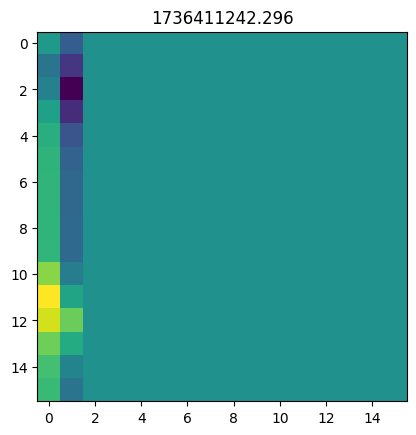

In [6]:
plt.title(tmp["timestamp"])
plt.imshow(tmp["eit"].real)
plt.show()